<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_netcdf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción a NetCDF4

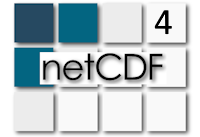

* [Web del proyecto](https://unidata.github.io/netcdf4-python/)
* [Referencia de la API](https://unidata.github.io/netcdf4-python/#header-functions)

* **¿Qué es netCDF4?** En este contexto es una intefaz Python para la librería C de NetCDFextensión de Python que permite trabajar con fichero en formato NetCDF.

* **¿Cómo se usa netCDF4?** Asignando un fichero netCDF a un objeto Python y operando con sus respectivos métodos.

* **¿Cuándo usar netCDF4?** Cuando sea preciso leer/escribir datos en formato netCDf y acceder a opciones avanzadas del formato.

* **¿Por qué netCDF4?** Porque es una interfaz directa a la librería de quienes mantienen el formato.




##Instalación

* La extensión NetCDF4 puede instalarse a través de múltiples repositorios de paquetes como `conda`

* En este notebook la instalaremos mediante `pip`


In [6]:
# Instalación de NetCDF4
# -----------------------
!pip -q install netcdf4

Adicionalmente instalaremos la extensión `Cartopy`

In [11]:
# Esta línea parece ser necesaria en Colab
# ----------------------------------------------
!pip -q install --no-binary shapely shapely --force

# Instalación de Cartopy
# ------------------------
!pip -q install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 74.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.0 MB/s eta 0:00:00


##Descarga de datos

Descargamos un fichero de datos del reanálisis ERA del ECMWF. En este caso se trata de campos de viento y temperatura en los niveles de presión de 1000, 850, 500 y 300 hPa, correspondientes a las 12:00 UTC del día 15 de cada mes de 2020.

Estos datos están disponibles gratuitamente en el portal de C3S de Copernicus: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=form



In [9]:
ifile = 'era5_pl_vt_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/yWpdSTonSFuJz6c/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_pl_vt_2020_europa_025.nc era5_2000.nc


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from era5_pl_vt_2020_europa_025.rar

Extracting  era5_pl_vt_2020_europa_025.nc                                  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%

In [12]:
# Importa netCDF4
# ----------------
import netCDF4

# Extensión base de Cartopy
# --------------------------
import cartopy.crs as ccrs

# Extensión gráfica genérica de Python
# ------------------------------------
import matplotlib.pyplot as plt

# Extensión de cálculo con arrays
# -------------------------------
import numpy as np